# I - Data description

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cci_data = pd.read_csv("CCInfo.csv")
cci_data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
cci_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [4]:
cci_data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [5]:
# Deleting missing values
cci_data.dropna(inplace = True)
cci_data.drop(['CUST_ID'], axis=1, inplace=True)
cci_data.shape

(8636, 17)

In [6]:
cci_data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000,8636.000000
mean,1601.224893,0.895035,1025.433874,604.901438,420.843533,994.175523,0.496000,0.205909,0.368820,0.137604,3.313918,15.033233,4522.091030,1784.478099,864.304943,0.159304,11.534391
std,2095.571300,0.207697,2167.107984,1684.307803,917.245182,2121.458303,0.401273,0.300054,0.398093,0.201791,6.912506,25.180468,3659.240379,2909.810090,2372.566350,0.296271,1.310984
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.049513,0.019163,0.000000,6.000000
25%,148.095189,0.909091,43.367500,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,418.559237,169.163545,0.000000,12.000000
50%,916.855459,1.000000,375.405000,44.995000,94.785000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,896.675701,312.452292,0.000000,12.000000
75%,2105.195853,1.000000,1145.980000,599.100000,484.147500,1132.385490,0.916667,0.333333,0.750000,0.250000,4.000000,18.000000,6500.000000,1951.142090,825.496463,0.166667,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [8]:
cci_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


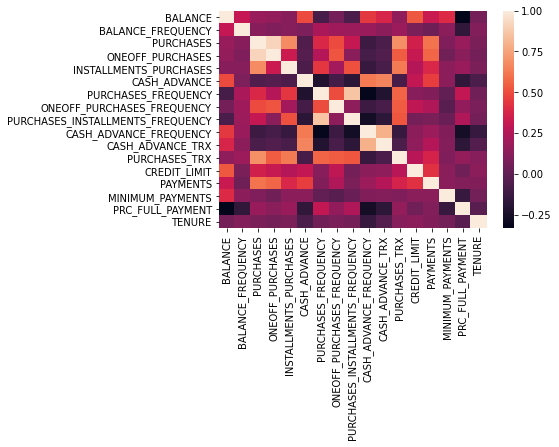

In [7]:
sns.heatmap(cci_data.corr());

## Test without preprocessing Kmodes

In [18]:
X= np.asarray(cci_data)
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmodes = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmodes.fit(X)
    # sse
    cost.append(kmodes.cost_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmodes.labels_, metric='euclidean')) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1278, cost: 88983.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1512, cost: 86395.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 768, cost: 84449.0
Run 1, iteration: 2/100, moves: 0, cost: 84449.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 682, cost: 84062.0
Run 1, iteration: 2/100, moves: 18, cost: 84062.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 110, cost: 83125.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 117, cost: 82798.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1

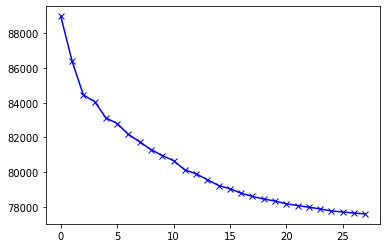

In [20]:
plt.plot(cost, 'bx-')

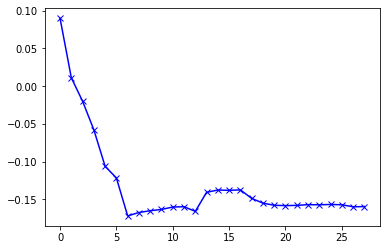

In [21]:
plt.plot(sil, 'bx-')

## Test without preprocessing Kmeans

In [6]:
X= np.asarray(cci_data)

In [7]:
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    # sse
    cost.append(kmean.inertia_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmean.labels_, metric='euclidean')) 

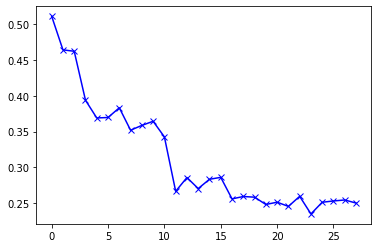

In [8]:
plt.plot(sil, 'bx-')

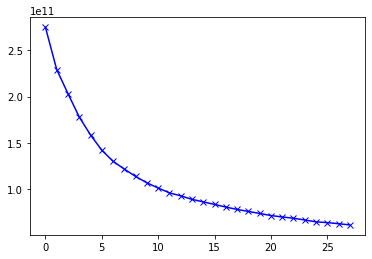

In [11]:
plt.plot(cost, 'bx-')

# II - Preprocessing

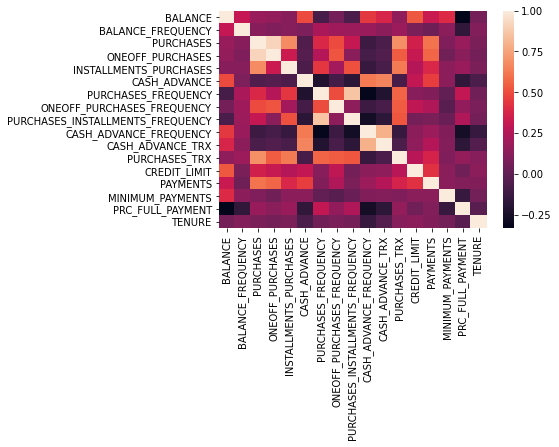

In [9]:
sns.heatmap(cci_data.corr());

In [8]:
cci_data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.310140,0.176083,0.159985,0.122109,0.495586,-0.088459,0.063832,-0.069582,0.445307,0.382388,0.147887,0.535518,0.322830,0.398669,-0.333594,0.066987
BALANCE_FREQUENCY,0.310140,1.000000,0.122635,0.095254,0.114739,0.089036,0.228158,0.187467,0.184159,0.181132,0.133265,0.183095,0.087682,0.039169,0.132519,-0.156961,0.104714
PURCHASES,0.176083,0.122635,1.000000,0.916780,0.679259,-0.053760,0.393000,0.497384,0.316025,-0.124863,-0.070277,0.688732,0.358425,0.606782,0.093842,0.176447,0.084545
ONEOFF_PURCHASES,0.159985,0.095254,0.916780,1.000000,0.329650,-0.033244,0.265460,0.524514,0.128380,-0.086413,-0.048705,0.545313,0.320613,0.570850,0.048741,0.129890,0.063400
INSTALLMENTS_PURCHASES,0.122109,0.114739,0.679259,0.329650,1.000000,-0.066099,0.441193,0.211829,0.511130,-0.136455,-0.076716,0.626083,0.258057,0.385391,0.132156,0.178440,0.083346
CASH_ADVANCE,0.495586,0.089036,-0.053760,-0.033244,-0.066099,1.000000,-0.218566,-0.090111,-0.178873,0.629030,0.656911,-0.078449,0.304161,0.459342,0.140094,-0.158566,-0.073090
PURCHASES_FREQUENCY,-0.088459,0.228158,0.393000,0.265460,0.441193,-0.218566,1.000000,0.502123,0.862338,-0.316771,-0.208749,0.567168,0.121372,0.100715,0.002979,0.305393,0.052161
ONEOFF_PURCHASES_FREQUENCY,0.063832,0.187467,0.497384,0.524514,0.211829,-0.090111,0.502123,1.000000,0.143911,-0.118225,-0.073384,0.544364,0.295432,0.244346,-0.030357,0.154073,0.080437
PURCHASES_INSTALLMENTS_FREQUENCY,-0.069582,0.184159,0.316025,0.128380,0.511130,-0.178873,0.862338,0.143911,1.000000,-0.268924,-0.172811,0.529192,0.063421,0.083424,0.030036,0.249547,0.065779
CASH_ADVANCE_FREQUENCY,0.445307,0.181132,-0.124863,-0.086413,-0.136455,0.629030,-0.316771,-0.118225,-0.268924,1.000000,0.799593,-0.136913,0.132841,0.182340,0.098844,-0.260001,-0.140038


In [10]:
cci_data.drop(['PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_TRX'], axis=1, inplace=True)

In [61]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cci_data)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

In [63]:
X= np.asarray(normalized_df)

In [64]:
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    # sse
    cost.append(kmean.inertia_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmean.labels_, metric='euclidean')) 

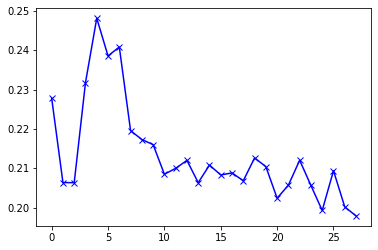

In [65]:
plt.plot(sil, 'bx-')

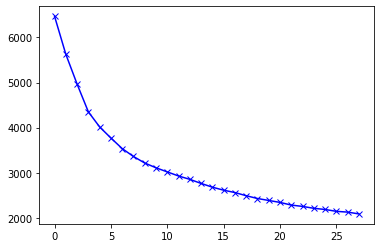

In [66]:
plt.plot(cost, 'bx-')

In [68]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_
clusters_Kmeans=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmeans.dropna(inplace = True)
clusters_Kmeans.to_csv("Kmeans/data.csv", index=False)

## Outliers

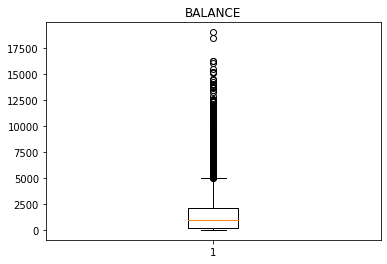

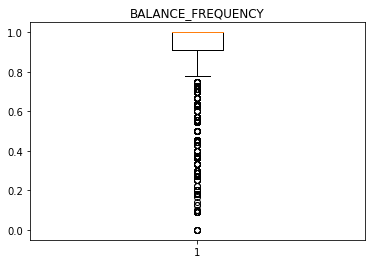

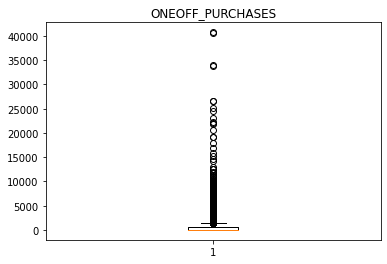

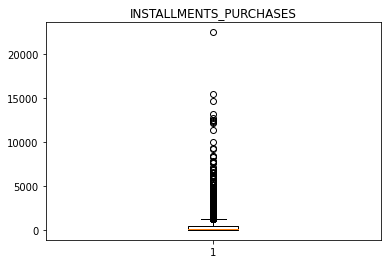

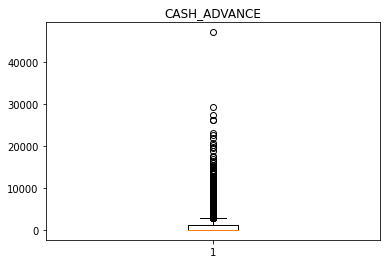

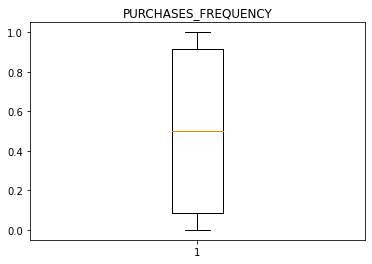

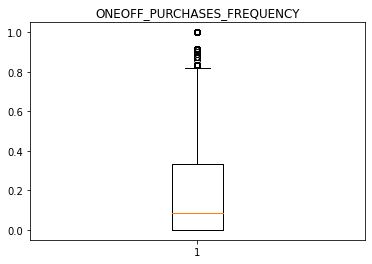

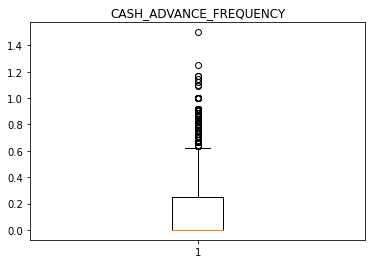

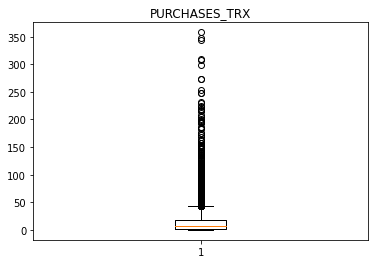

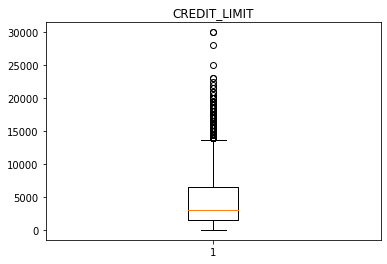

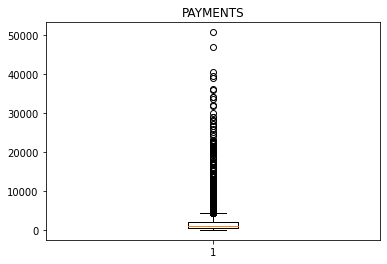

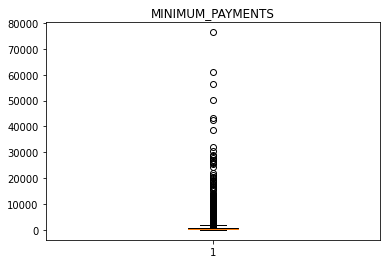

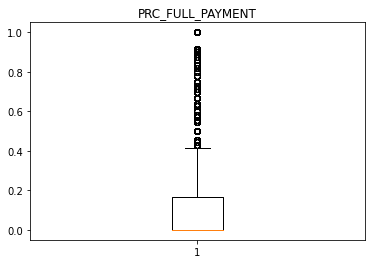

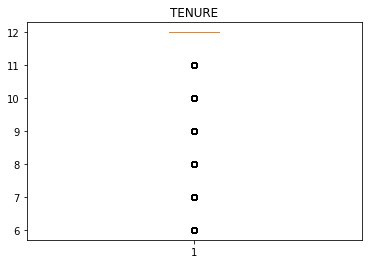

In [11]:
for col in cci_data:
    plt.boxplot(cci_data[col])
    plt.title(col)
    plt.show()

In [23]:
columns=['BALANCE', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT',
        'PAYMENTS', 'MINIMUM_PAYMENTS']

for c in columns:
    
    Range=c+'_RANGE'
    cci_data[Range]=0        
    cci_data.loc[((cci_data[c]>0)&(cci_data[c]<=500)),Range]=1
    cci_data.loc[((cci_data[c]>500)&(cci_data[c]<=1000)),Range]=2
    cci_data.loc[((cci_data[c]>1000)&(cci_data[c]<=3000)),Range]=3
    cci_data.loc[((cci_data[c]>3000)&(cci_data[c]<=5000)),Range]=4
    cci_data.loc[((cci_data[c]>5000)&(cci_data[c]<=10000)),Range]=5
    cci_data.loc[((cci_data[c]>10000)),Range]=6
    
columns = ['BALANCE_FREQUENCY', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 
         'CASH_ADVANCE_FREQUENCY', 'PRC_FULL_PAYMENT']

for c in columns:
    
    Range=c+'_RANGE'
    cci_data[Range]=0
    cci_data.loc[((cci_data[c]>0)&(cci_data[c]<=0.1)),Range]=1
    cci_data.loc[((cci_data[c]>0.1)&(cci_data[c]<=0.2)),Range]=2
    cci_data.loc[((cci_data[c]>0.2)&(cci_data[c]<=0.3)),Range]=3
    cci_data.loc[((cci_data[c]>0.3)&(cci_data[c]<=0.4)),Range]=4
    cci_data.loc[((cci_data[c]>0.4)&(cci_data[c]<=0.5)),Range]=5
    cci_data.loc[((cci_data[c]>0.5)&(cci_data[c]<=0.6)),Range]=6
    cci_data.loc[((cci_data[c]>0.6)&(cci_data[c]<=0.7)),Range]=7
    cci_data.loc[((cci_data[c]>0.7)&(cci_data[c]<=0.8)),Range]=8
    cci_data.loc[((cci_data[c]>0.8)&(cci_data[c]<=0.9)),Range]=9
    cci_data.loc[((cci_data[c]>0.9)&(cci_data[c]<=1.0)),Range]=10
    
columns = ['PURCHASES_TRX', 'CASH_ADVANCE_TRX']  

for c in columns:
    
    Range=c+'_RANGE'
    cci_data[Range]=0
    cci_data.loc[((cci_data[c]>0)&(cci_data[c]<=5)),Range]=1
    cci_data.loc[((cci_data[c]>5)&(cci_data[c]<=10)),Range]=2
    cci_data.loc[((cci_data[c]>10)&(cci_data[c]<=15)),Range]=3
    cci_data.loc[((cci_data[c]>15)&(cci_data[c]<=20)),Range]=4
    cci_data.loc[((cci_data[c]>20)&(cci_data[c]<=30)),Range]=5
    cci_data.loc[((cci_data[c]>30)&(cci_data[c]<=50)),Range]=6
    cci_data.loc[((cci_data[c]>50)&(cci_data[c]<=100)),Range]=7
    cci_data.loc[((cci_data[c]>100)),Range]=8
    

cci_data.drop(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY',  'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT' ], axis=1, inplace=True)


In [25]:
X= np.asarray(cci_data)

In [26]:
X

array([[12,  1,  1, ...,  0,  1,  0],
       [12,  4,  0, ...,  3,  0,  1],
       [12,  3,  2, ...,  0,  3,  0],
       ...,
       [ 6,  1,  1, ...,  3,  1,  0],
       [ 6,  1,  0, ...,  3,  0,  1],
       [ 6,  1,  3, ...,  0,  5,  1]], dtype=int64)

## Normal scaling

In [27]:
X= np.asarray(cci_data)
scale = StandardScaler()
X = scale.fit_transform(X)
X.shape

(8636, 17)

## Parameter tuning using sse and elbow criteria Kmodes

In [28]:
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmodes = KModes(n_clusters=i, init = "Cao", n_init = 1, verbose=1)
    kmodes.fit(X)
    # sse
    cost.append(kmodes.cost_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmodes.labels_, metric='euclidean')) 

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 488, cost: 63790.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1334, cost: 58886.0
Run 1, iteration: 2/100, moves: 49, cost: 58886.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1252, cost: 56921.0
Run 1, iteration: 2/100, moves: 253, cost: 56921.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1414, cost: 55685.0
Run 1, iteration: 2/100, moves: 272, cost: 55685.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1510, cost: 54854.0
Run 1, iteration: 2/100, moves: 397, cost: 54854.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1482, cost: 53919.0
Run 1,

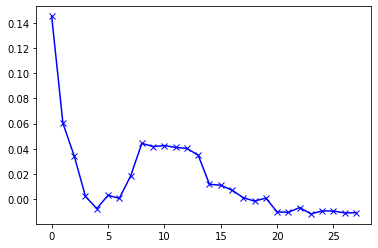

In [31]:
plt.plot(sil, 'bx-')

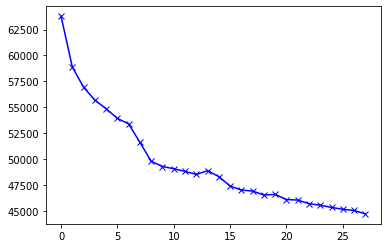

In [32]:
plt.plot(cost, 'bx-')

## Kmeans with K=8

In [36]:
kmodes= KModes(n_clusters=8, init = "Cao", n_init = 1, verbose=1)
kmodes.fit(X)
labels=kmodes.labels_
clusters_Kmode=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_Kmode.dropna(inplace = True)
clusters_Kmode.to_csv("Kmodes/data.csv", index=False)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1461, cost: 53379.0
Run 1, iteration: 2/100, moves: 88, cost: 53379.0


## Parameter tuning using sse and elbow criteria Kmeans

In [33]:
n_clusters=30
cost=[]
sil=[]
for i in range(2,n_clusters):
    kmean= KMeans(i)
    kmean.fit(X)
    # sse
    cost.append(kmean.inertia_)
    # silouhaite
    #print(np.unique(kmean.labels_))
    sil.append(silhouette_score(X, kmean.labels_, metric='euclidean')) 

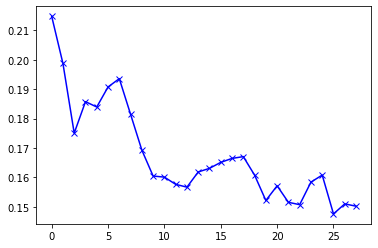

In [34]:
plt.plot(sil, 'bx-')

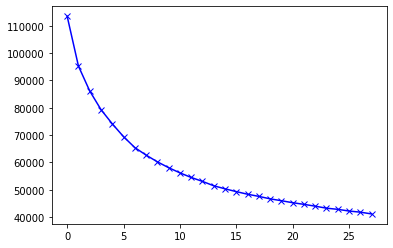

In [35]:
plt.plot(cost, 'bx-')

## Kmeans with K=6

In [41]:
kmean= KMeans(6)
kmean.fit(X)
labels=kmean.labels_

## Interpretation of Clusters

In [13]:
clusters=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters.dropna(inplace = True)
clusters.head()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE,cluster
0,12.0,1.0,1.0,0.0,1.0,0.0,2.0,1.0,1.0,9.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,12.0,4.0,0.0,0.0,0.0,5.0,5.0,4.0,3.0,10.0,0.0,0.0,0.0,3.0,3.0,0.0,1.0,4.0
2,12.0,3.0,2.0,2.0,0.0,0.0,5.0,2.0,2.0,10.0,10.0,10.0,0.0,0.0,0.0,3.0,0.0,3.0
4,12.0,2.0,1.0,1.0,0.0,0.0,3.0,2.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
5,12.0,3.0,3.0,0.0,3.0,0.0,3.0,3.0,3.0,10.0,7.0,0.0,6.0,0.0,0.0,2.0,0.0,3.0


In [14]:
clusters.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
cluster,,,,,,,,,,,,,,,,,
0.0,11.631769,2.359206,1.580776,1.026625,0.939079,1.276625,3.833484,2.424188,1.652076,9.177347,4.997292,2.234657,3.704874,1.578520,1.666065,2.407491,0.893953
1.0,11.607006,2.250137,1.631637,1.031199,0.998358,1.188834,3.734537,2.374384,1.602627,8.985769,5.261631,2.223317,3.989600,1.445539,1.783799,2.522715,0.815545
2.0,11.545729,2.289447,1.504523,0.928643,0.881407,1.245226,3.707538,2.321608,1.649246,9.032161,5.007035,2.011055,3.741709,1.549749,1.538693,2.344724,0.837186
3.0,11.650594,2.449336,1.684836,1.115304,1.009085,1.331936,3.962264,2.527603,1.716282,9.228512,5.260657,2.364081,3.946191,1.638015,1.696716,2.579315,0.908456
4.0,11.622103,2.421569,1.673797,1.107843,0.958111,1.261141,3.893048,2.476827,1.716578,9.209447,5.110517,2.373440,3.832442,1.552585,1.581105,2.515152,0.860071
5.0,11.620321,2.447861,1.695187,1.133690,0.953209,1.274064,3.909091,2.529412,1.770053,9.200535,5.544118,2.585561,3.977273,1.522727,1.537433,2.609626,0.835561


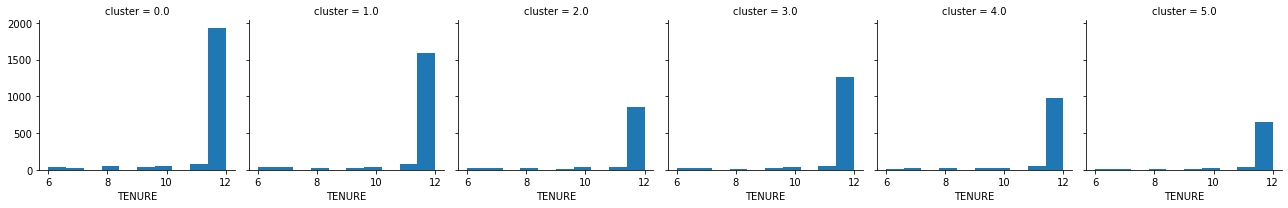

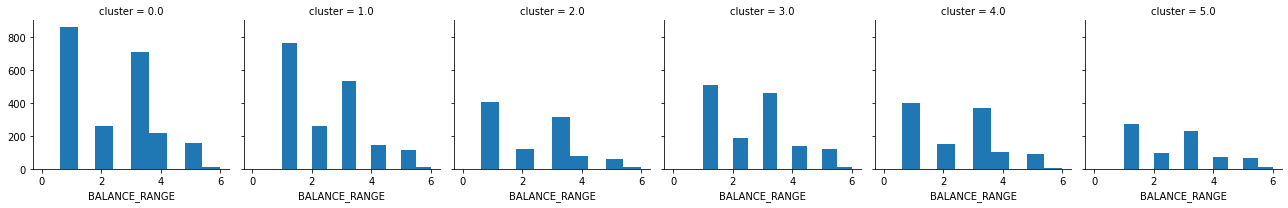

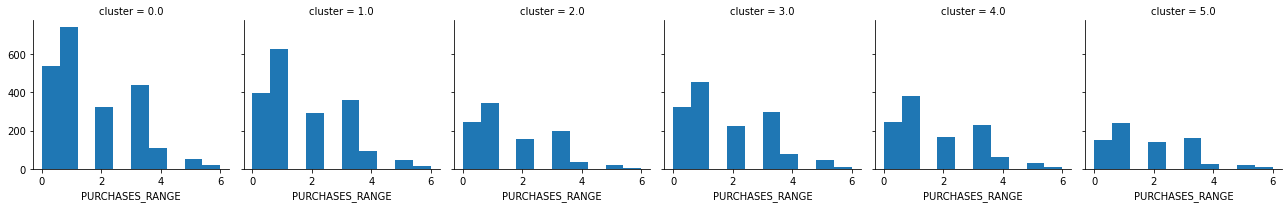

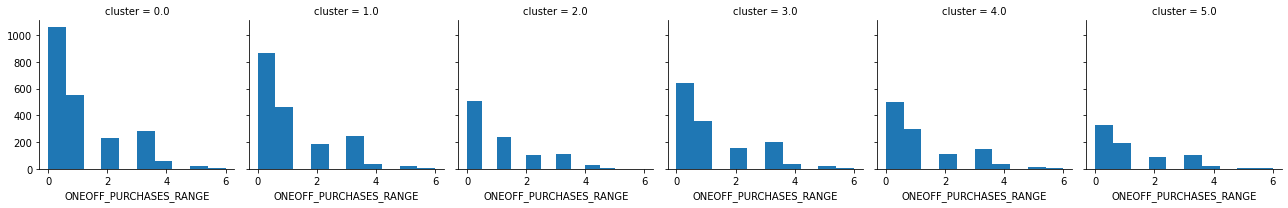

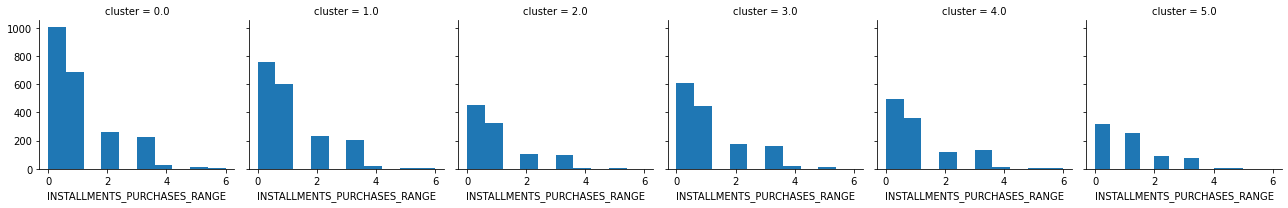

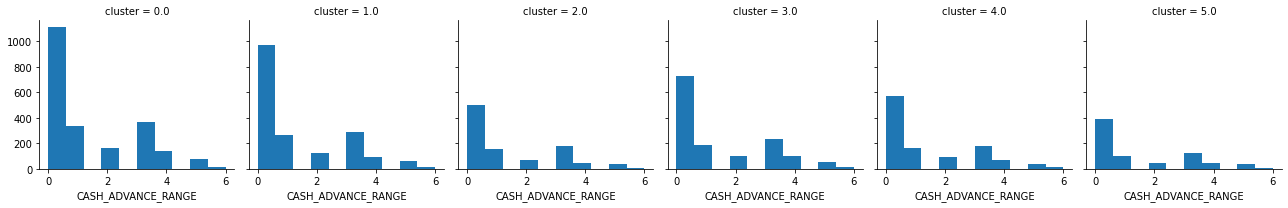

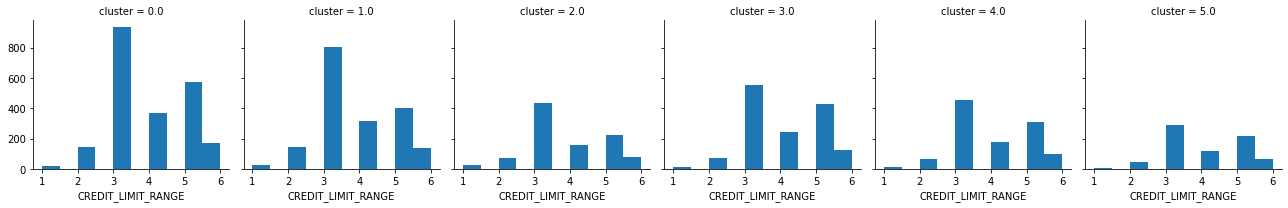

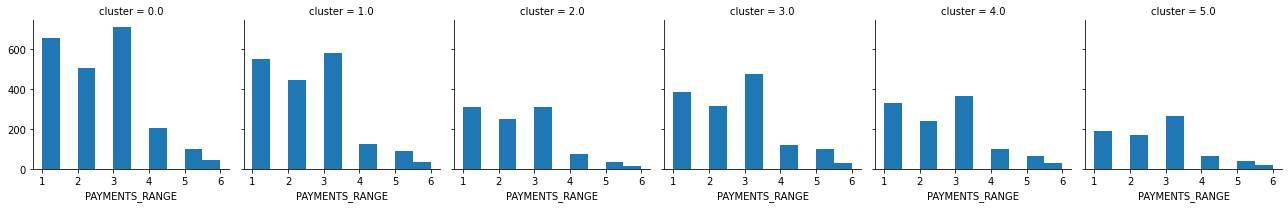

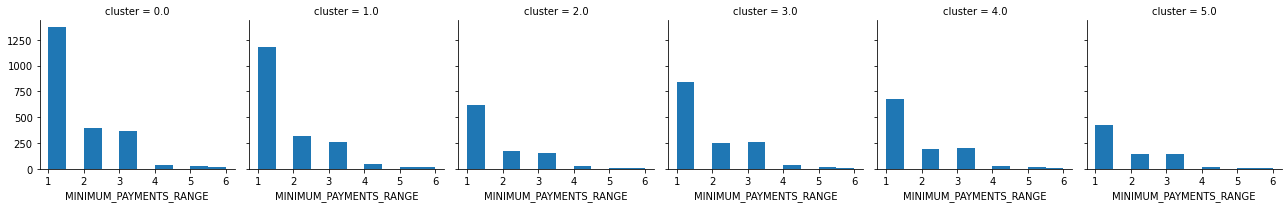

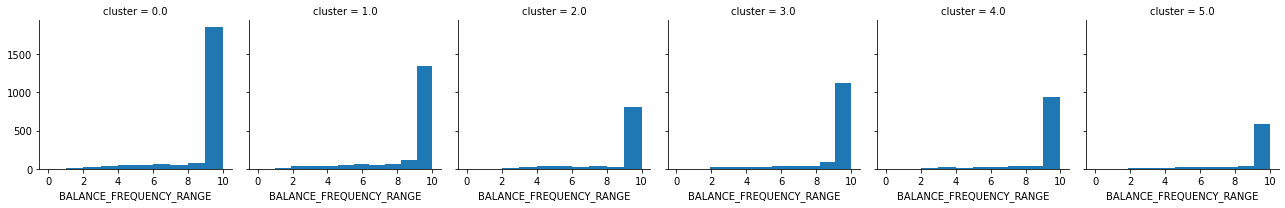

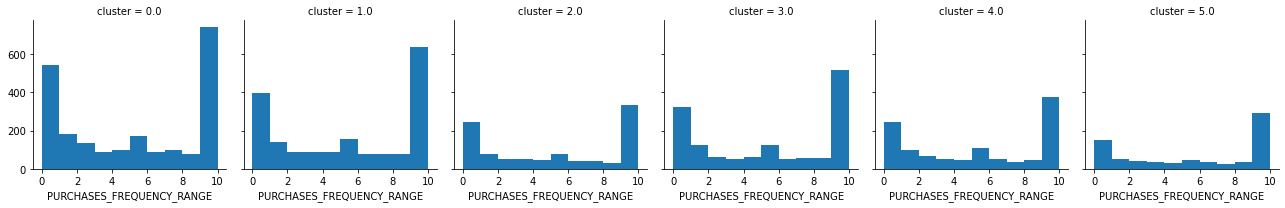

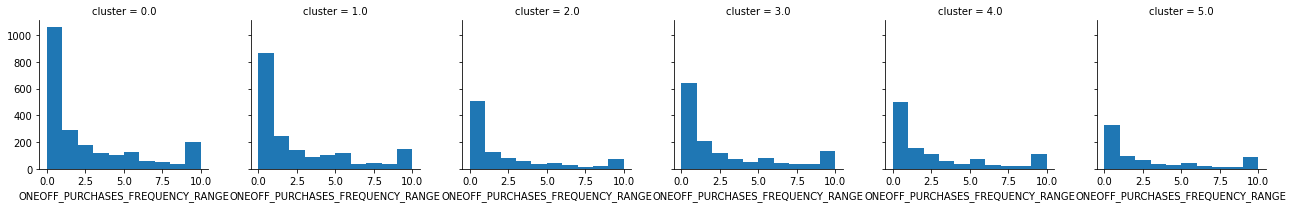

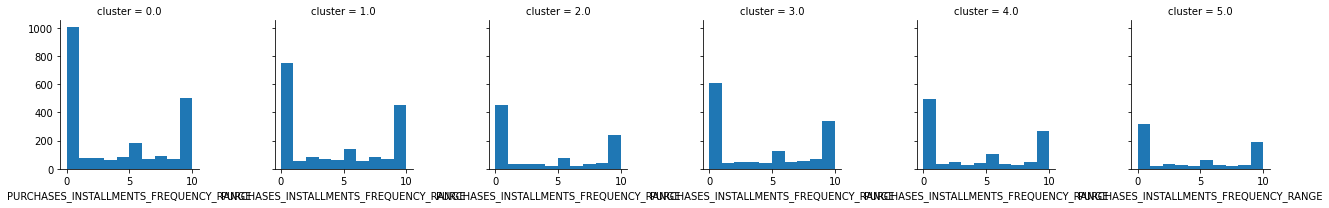

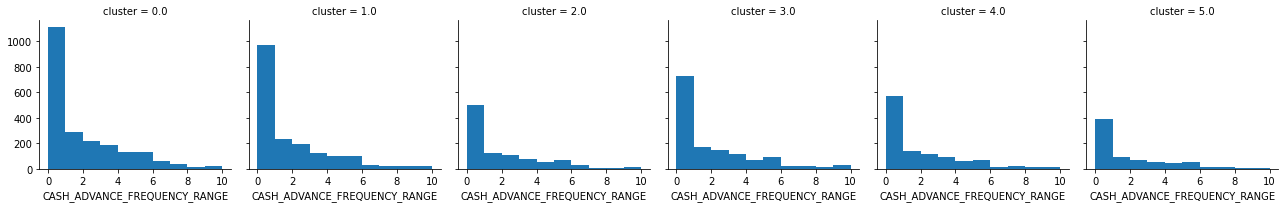

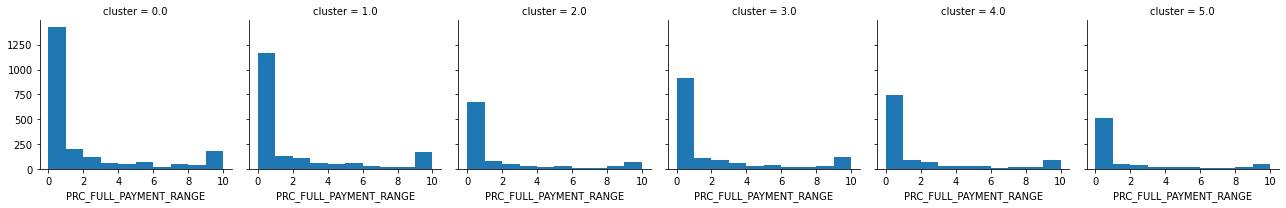

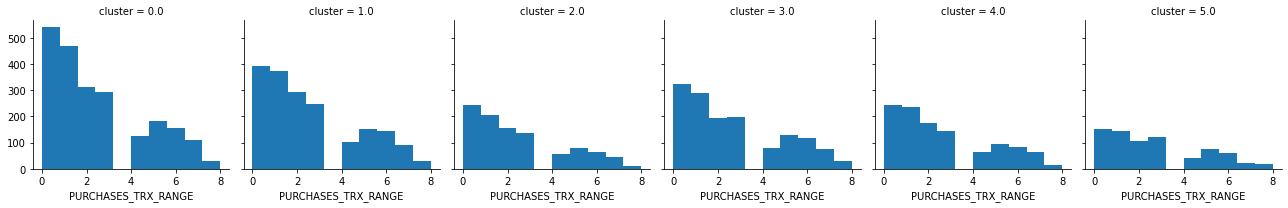

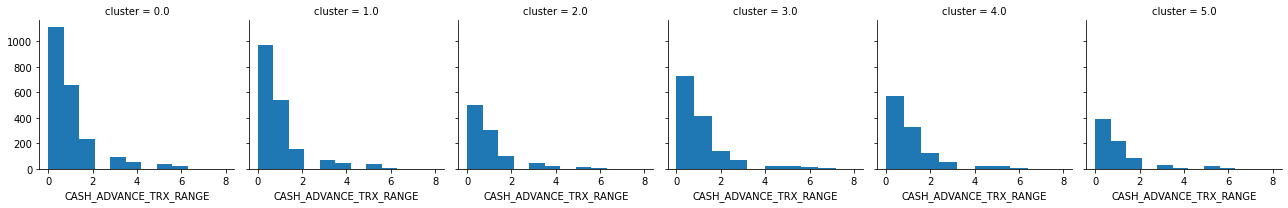

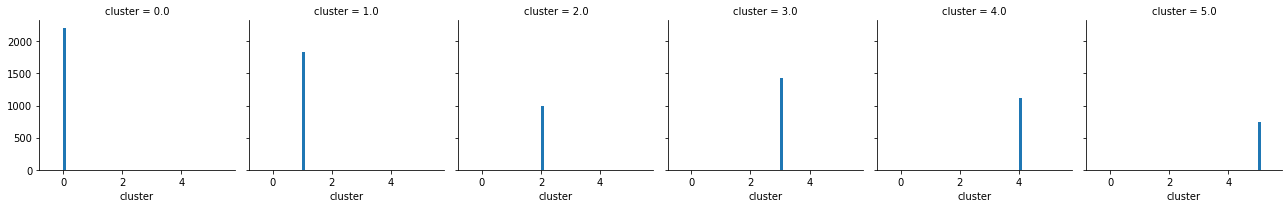

In [15]:
for c in clusters:
    grid= sns.FacetGrid(clusters, col='cluster')
    grid.map(plt.hist, c)

In [16]:
X.shape

(8636, 17)

In [17]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8636, 2)

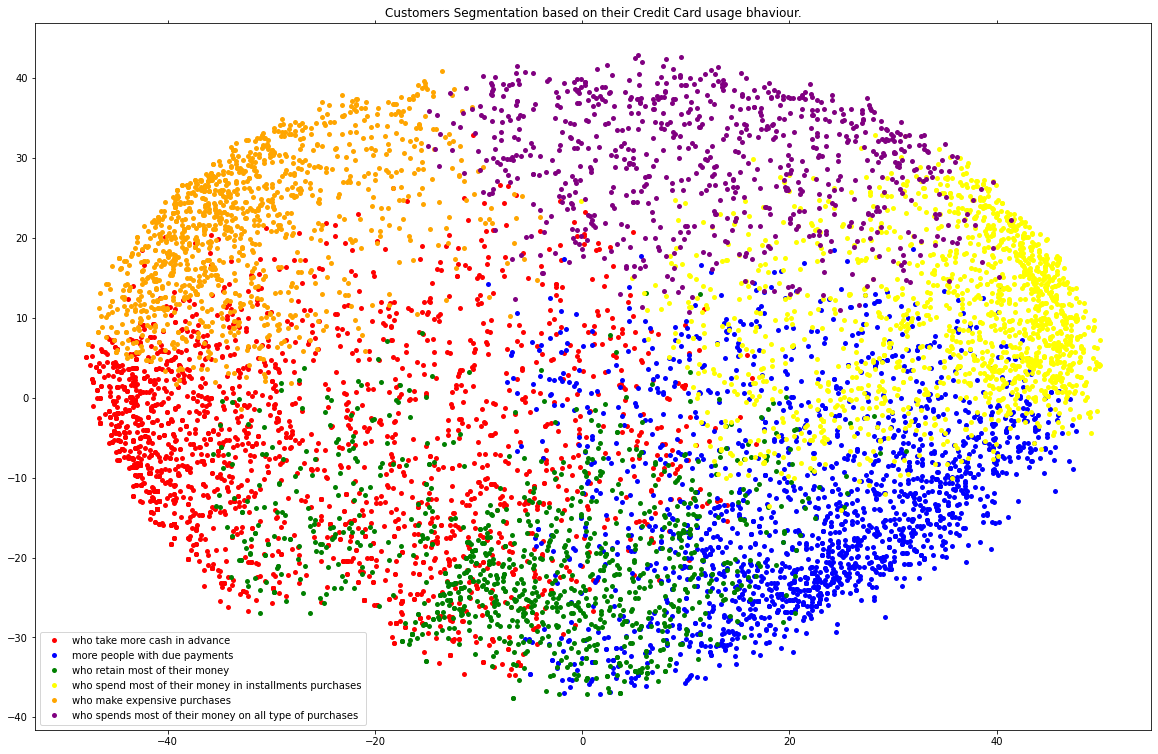

In [18]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5: 'purple'}

names = {0: 'who take more cash in advance',#ok
         1: 'more people with due payments', 
         2: 'who retain most of their money',#ok 
         3: 'who spend most of their money in installments purchases',#ok
         4: 'who make expensive purchases',
         5: 'who spends most of their money on all type of purchases'}#ok
  
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

In [46]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score

In [48]:
cci_data = pd.read_csv("CCInfo.csv")
cci_data.dropna(inplace = True)
cci_data.drop(['CUST_ID'], axis=1, inplace=True)

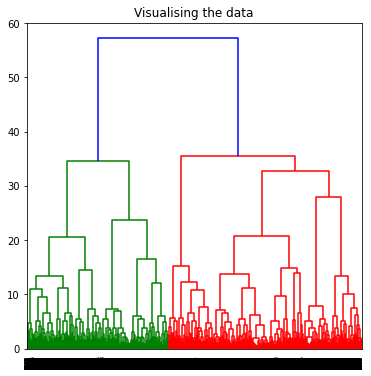

In [49]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(cci_data)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward', metric= 'euclidean')))

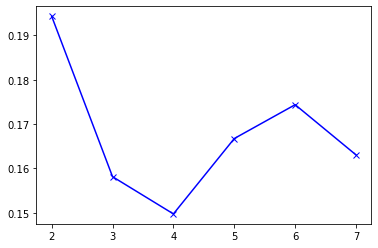

In [50]:
#silhouette_scores = [np.nan,np.nan] 
sil = []
cost = []
for n_cluster in range(2, 8):
    sil.append(silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df)))
    #cost.append(AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df).inertia_)
    

plt.plot(np.arange(2,8), sil, 'bx-')

In [51]:
agg = AgglomerativeClustering(n_clusters = 6).fit_predict(normalized_df)

In [52]:
clusters=pd.concat([cci_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters.dropna(inplace = True)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,1.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,2.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,3.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,3.0


In [53]:
clusters_H=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_H.dropna(inplace = True)
clusters_H.to_csv("Hierach/data.csv", index=False)

In [27]:
clusters.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
cluster,,,,,,,,,,,,,,,,,
0.0,11.601824,2.274772,1.627964,1.051672,0.968997,1.173860,3.748328,2.369605,1.623100,9.013374,5.213374,2.239514,3.914894,1.406687,1.655319,2.528875,0.789058
1.0,11.630204,2.381311,1.619575,1.050044,0.964570,1.272365,3.845438,2.445084,1.664748,9.199291,5.091231,2.259079,3.785208,1.568645,1.581931,2.463685,0.875111
2.0,11.643993,2.446996,1.683746,1.137809,0.939929,1.250000,3.903710,2.512367,1.745583,9.216431,5.367491,2.557420,3.937279,1.536219,1.650177,2.597173,0.855124
3.0,11.652565,2.469593,1.666314,1.112110,0.988895,1.364357,3.995241,2.539397,1.735061,9.226335,5.206240,2.425172,3.840825,1.694342,1.640931,2.552618,0.937599
4.0,11.508541,2.130092,1.521682,0.898817,0.936925,1.152431,3.505913,2.226018,1.544021,8.921156,5.090670,1.930355,3.921156,1.440210,1.940867,2.300920,0.800263
5.0,11.585890,2.285276,1.515337,0.911043,0.912577,1.285276,3.800613,2.375767,1.648773,9.039877,4.924847,1.932515,3.762270,1.550613,1.673313,2.302147,0.874233


In [54]:
kmean= KMeans(500)
kmean.fit(X)
labels=kmean.labels_

In [55]:
Kmeans_clusters=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
Kmeans_clusters.dropna(inplace = True)
Kmeans_clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,421.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,53.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,22.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,317.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,30.0


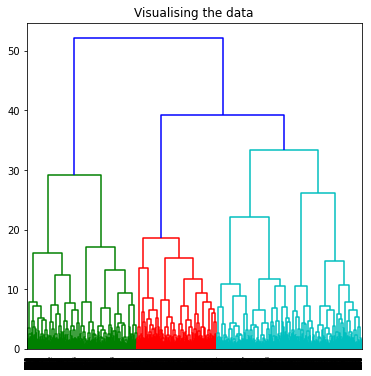

In [56]:
scaler = StandardScaler() 
scaled_df = scaler.fit_transform(Kmeans_clusters)
normalized_df = normalize(scaled_df)
normalized_df = pd.DataFrame(normalized_df)

plt.figure(figsize =(6, 6)) 
plt.title('Visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(normalized_df, method ='ward', metric= 'euclidean')))

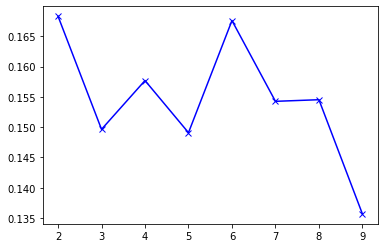

In [57]:
sil = []
cost = []
for n_cluster in range(2, 10):
    sil.append(silhouette_score(normalized_df, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df)))
    #cost.append(AgglomerativeClustering(n_clusters = n_cluster).fit_predict(normalized_df).inertia_)
    

plt.plot(np.arange(2,10), sil, 'bx-')

In [58]:
agg = AgglomerativeClustering(n_clusters = 7).fit_predict(normalized_df)

In [59]:
clusters=pd.concat([cci_data, pd.DataFrame({'cluster':agg})], axis=1)
clusters.dropna(inplace = True)
clusters.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,2.0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,4.0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,1.0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,4.0


In [60]:
clusters_KH=pd.concat([cci_data, pd.DataFrame({'cluster':labels})], axis=1)
clusters_KH.dropna(inplace = True)
clusters_KH.to_csv("Kmean_Hierach/data.csv", index=False)

In [47]:
clusters.groupby('cluster').mean()

,TENURE,BALANCE_RANGE,PURCHASES_RANGE,ONEOFF_PURCHASES_RANGE,INSTALLMENTS_PURCHASES_RANGE,CASH_ADVANCE_RANGE,CREDIT_LIMIT_RANGE,PAYMENTS_RANGE,MINIMUM_PAYMENTS_RANGE,BALANCE_FREQUENCY_RANGE,PURCHASES_FREQUENCY_RANGE,ONEOFF_PURCHASES_FREQUENCY_RANGE,PURCHASES_INSTALLMENTS_FREQUENCY_RANGE,CASH_ADVANCE_FREQUENCY_RANGE,PRC_FULL_PAYMENT_RANGE,PURCHASES_TRX_RANGE,CASH_ADVANCE_TRX_RANGE
cluster,,,,,,,,,,,,,,,,,
0.0,11.612217,2.393799,1.586765,1.030541,0.924572,1.277649,3.891254,2.452568,1.680241,9.155946,4.950023,2.246645,3.677464,1.563628,1.571957,2.408607,0.874595
1.0,11.654155,2.453083,1.730563,1.154826,1.028820,1.323727,3.949732,2.512064,1.733244,9.209115,5.310322,2.448391,3.987936,1.644772,1.716488,2.626676,0.919571
2.0,11.620690,2.452217,1.652217,1.086700,0.940887,1.277833,3.917241,2.494581,1.741872,9.212808,5.376355,2.424631,3.910345,1.530049,1.472906,2.519212,0.852217
3.0,11.650954,2.287318,1.675645,1.075196,1.046016,1.219978,3.866442,2.466891,1.600449,9.043771,5.447811,2.388328,4.117845,1.460157,1.760943,2.659933,0.822671
4.0,11.710704,2.396336,1.637416,1.096432,0.967213,1.245902,3.856316,2.467695,1.688525,9.279653,5.107040,2.360656,3.759884,1.587271,1.663452,2.529412,0.884282
5.0,11.567480,2.260163,1.591870,0.990244,0.959350,1.204878,3.713821,2.367480,1.642276,9.087805,5.112195,2.105691,3.826016,1.481301,1.765854,2.367480,0.853659
6.0,11.553592,2.330978,1.544170,1.002356,0.875147,1.247350,3.746761,2.322733,1.660777,9.065960,5.017668,2.155477,3.700824,1.546525,1.571260,2.388693,0.835100


In [48]:
1+1

2